# **Analyse des applications et avis du Google Play Store - by AHMED**

# Importation des données

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
data1 = pd.read_csv('googleplaystore.csv')
data2 = pd.read_csv('googleplaystore_user_reviews.csv')

# Exploration des données

## data1 :

In [217]:
data1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [218]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [219]:
data1.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [220]:
data1.duplicated().sum()

483

## data2 :

In [221]:
data2.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


In [222]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [223]:
data2.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [224]:
data2.duplicated().sum()

33616

# Nettoyage des données

## Convertir les colonnes aux bons types de données :

**Convertir Reviews, Installs et Price en types numériques après nettoyage**

In [225]:
data1['Reviews'] = data1['Reviews'].str.replace('M', '').astype(float)

In [226]:
data1['Installs']=data1['Installs'].str.replace('Free','0')
data1['Installs'] = data1['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

In [227]:
data1['Price'] = data1['Price'].str.replace('Everyone', '0')
data1['Price'] = data1['Price'].str.replace('$','').astype(float)

**Traiter Size pour le convertir en format numérique**

In [228]:
data1['Size'] = data1['Size'].str.replace('M','')
data1['Size'] = data1['Size'].str.replace('k','')
data1['Size'] = data1['Size'].str.replace('1,000+','1')
data1['Size'] = data1['Size'].str.replace('Varies with device','0')
data1['Size'] = data1['Size'].astype(float)

**Convertir Last Updated en format de date.**

In [229]:
data1['Last Updated'] = pd.to_datetime(data1['Last Updated'], format='mixed', errors='coerce')

In [230]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


## les valeurs nulles :

In [231]:
frq = (data1.isnull().sum()/len(data1))*100
frq

,0
App,0.000000
Category,0.000000
Rating,13.596532
Reviews,0.000000
Size,0.000000
Installs,0.000000
Type,0.009224
Price,0.000000
Content Rating,0.009224
Genres,0.000000


In [232]:
data1['Rating'].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [233]:
data1['Rating'].fillna(data1['Rating'].median(), inplace=True)
data1.dropna(inplace=True)

<ipython-input-233-f98e0742b949>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Rating'].fillna(data1['Rating'].median(), inplace=True)


## supprimer les doublons dans data2 :

In [234]:
data2.duplicated().sum()

33616

In [235]:
data2.drop_duplicates(inplace=True)

In [236]:
data2.dropna(inplace=True)

In [237]:
data2.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


# Analyse des données

## **Apps categories**

In [238]:
data1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

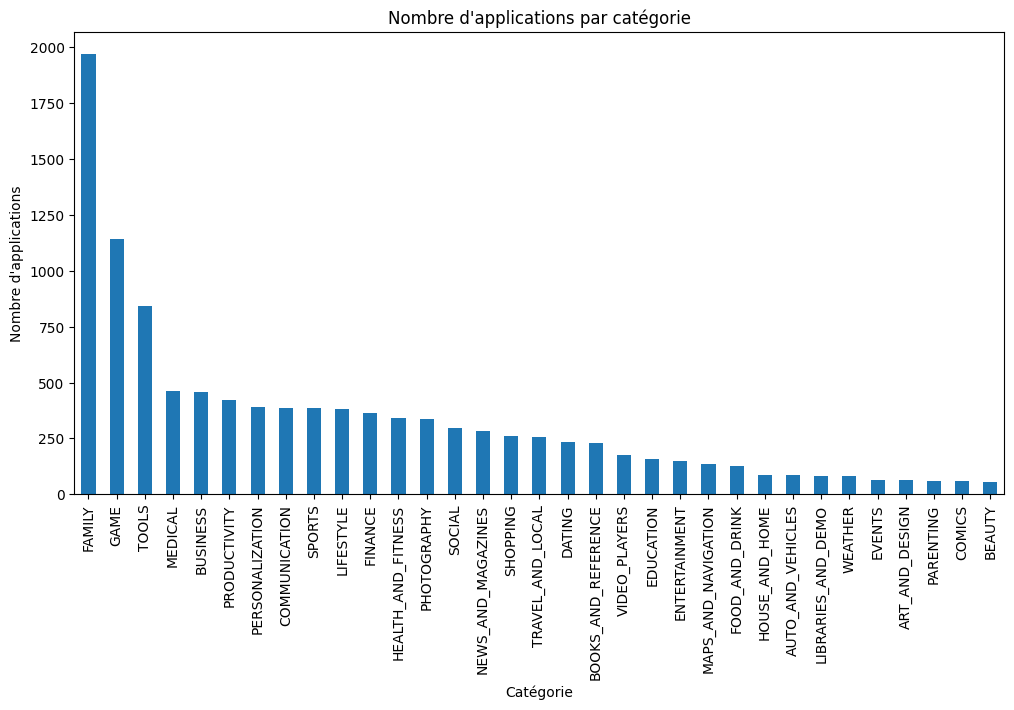

In [239]:
dt =data1['Category'].value_counts()
dt.plot(kind='bar', figsize=(12, 6))
plt.title('Nombre d\'applications par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'applications')
plt.show()

## **Distribution des notes des applications**

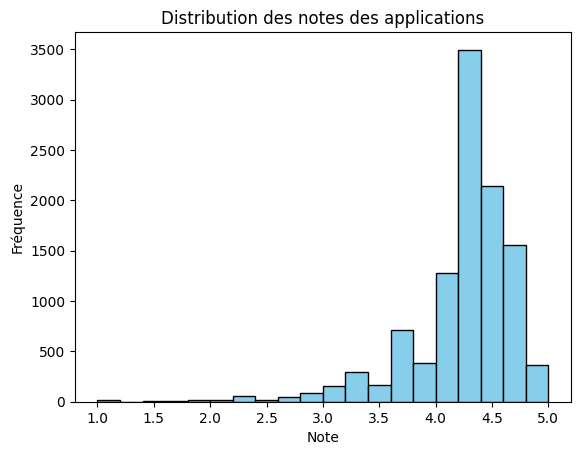

In [240]:
data1['Rating'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des notes des applications')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.show()

## **Prix moyen des applications par catégorie**

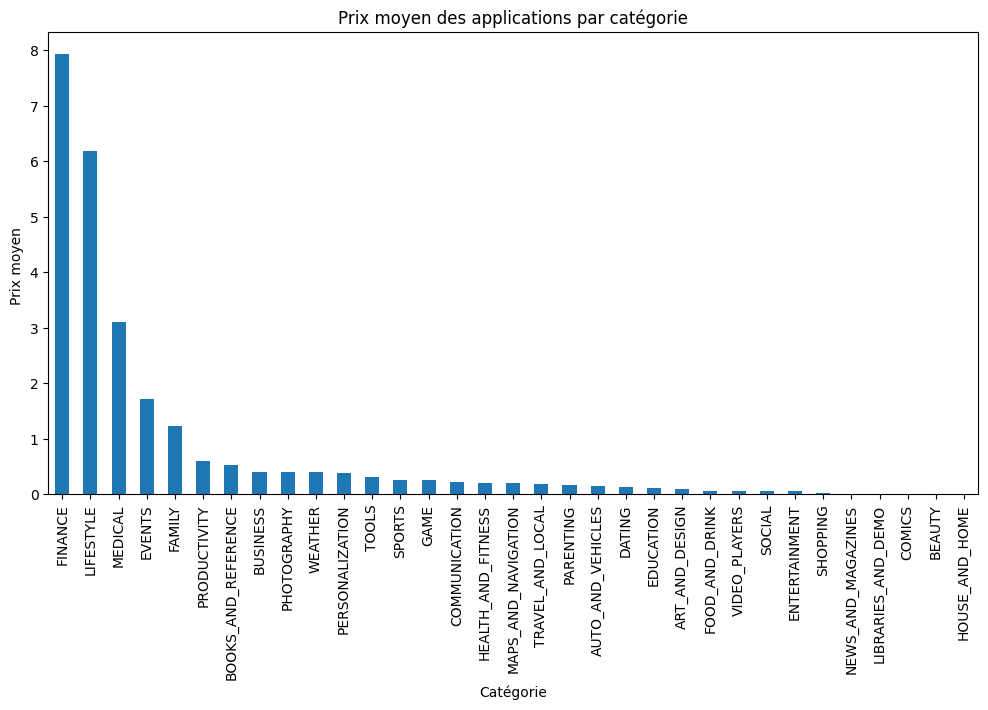

In [241]:
avg_price_par_category = data1.groupby('Category')['Price'].mean().sort_values(ascending=False)
avg_price_par_category.plot(kind='bar', figsize=(12, 6))
plt.title('Prix moyen des applications par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen ')
plt.show()


## **la relation entre la colonne Size (taille) et Price (prix)**

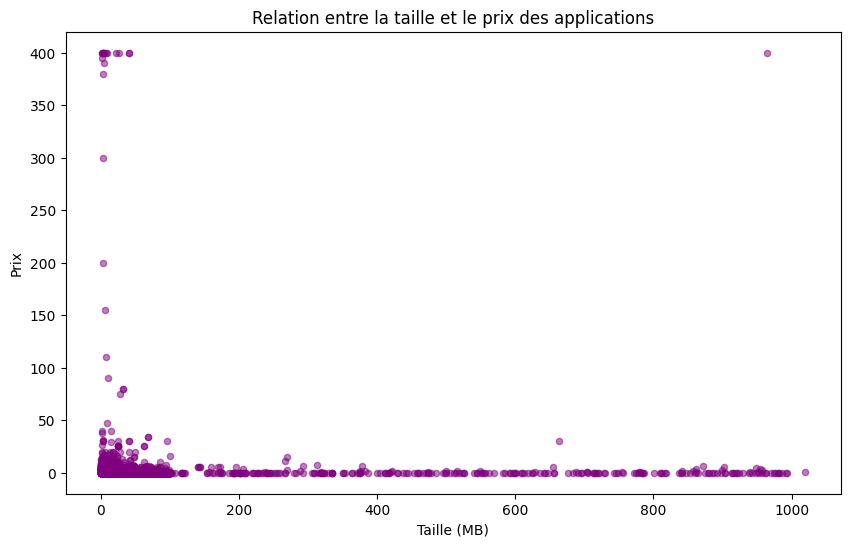

In [242]:
data1.plot.scatter(x='Size', y='Price', alpha=0.5, color='purple', figsize=(10, 6))
plt.title('Relation entre la taille et le prix des applications')
plt.xlabel('Taille (MB)')
plt.ylabel('Prix')
plt.show()


## **Filtrer les applications "junk"**

**les applications de mauvaise qualité**

In [243]:
junk_apps = data1[(data1['Rating'] < 2) & (data1['Reviews'] < 10)]
df_cleaned = data1.drop(junk_apps.index)
print(f"Nombre d'applications supprimées : {len(junk_apps)}")


Nombre d'applications supprimées : 23


## **Comparez le nombre moyen d'installations entre les applications gratuites et payantes**

In [244]:
data1[data1['Type']=='Free']['Installs'].mean()

16702447.299242424

In [245]:
data1[data1['Type']=='Paid']['Installs'].mean()

91474.36762860727

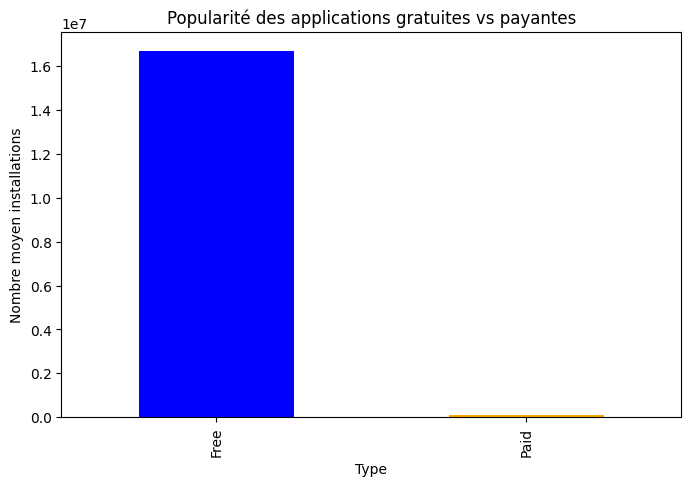

In [246]:
install_moy = data1.groupby('Type')['Installs'].mean()
install_moy.plot(kind='bar', figsize=(8, 5), color=['blue', 'orange'])
plt.title('Popularité des applications gratuites vs payantes')
plt.xlabel('Type')
plt.ylabel('Nombre moyen installations')
plt.show()


## **Analyse de sentiment des avis des utilisateurs**

In [252]:
data2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [253]:
data2['Sentiment'].value_counts()

,count
Sentiment,
Positive,19015
Negative,6321
Neutral,4356


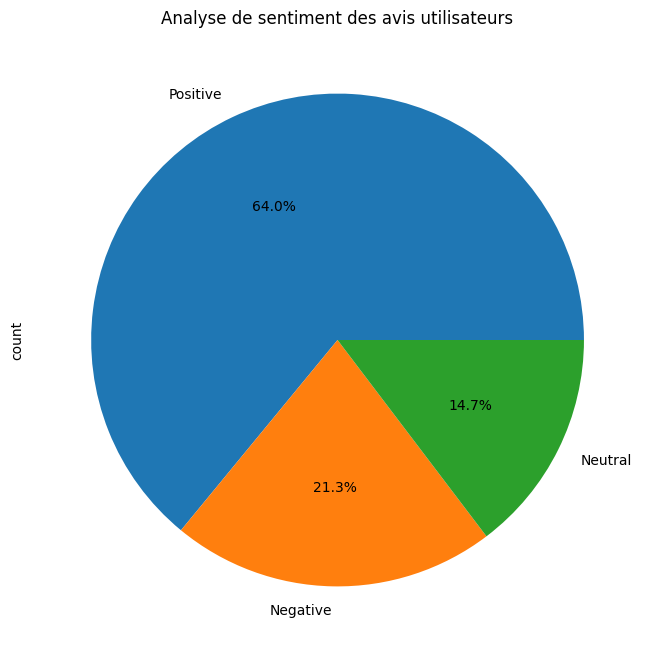

In [254]:
data2['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Analyse de sentiment des avis utilisateurs')
plt.show()

merge les donnees du les deux fichiers:

In [255]:
data_merge = data1.merge(data2, on='App', how='inner')

**Sentiments par gategories :**

In [264]:
sentiments_by_category = data_merge.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)
sentiments_sorted = sentiments_by_category.sort_values(by='Positive', ascending=False)
print(sentiments_sorted)


Sentiment            Negative  Neutral  Positive
Category                                        
GAME                     3746      435      5839
FAMILY                   1041      337      2409
HEALTH_AND_FITNESS        311      320      2155
PRODUCTIVITY              382      273      1398
SPORTS                    493      313      1326
TRAVEL_AND_LOCAL          453      349      1286
MEDICAL                   274      269      1180
DATING                    395      317      1102
PHOTOGRAPHY               318      206      1083
FINANCE                   362      229      1065
TOOLS                     296      353      1013
COMMUNICATION             280      226       886
PERSONALIZATION           201      190       837
SHOPPING                  267      174       822
ENTERTAINMENT             327      195       813
BUSINESS                  212      317       777
NEWS_AND_MAGAZINES        323      177       773
EDUCATION                 111      102       693
LIFESTYLE           

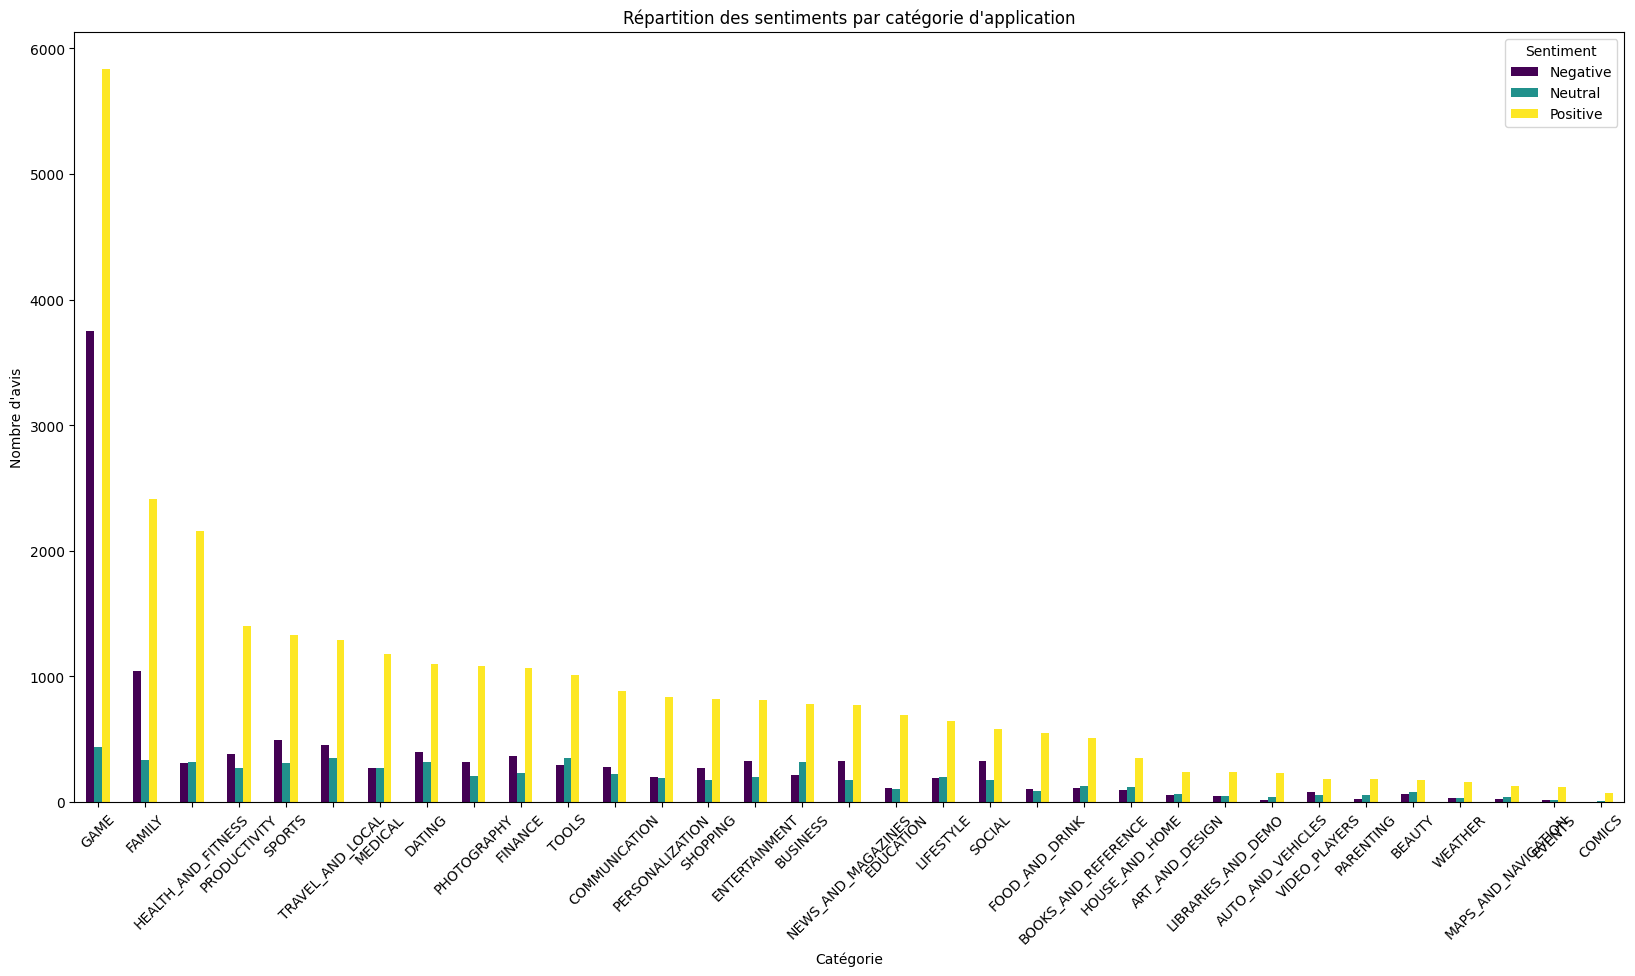

In [265]:
sentiments_sorted.plot(kind='bar', figsize=(20, 10), colormap='viridis')
plt.title('Répartition des sentiments par catégorie d\'application')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'avis')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()
